# Graph editing and complex topologies
We can edit principal graphs or build principal graphs with complex topologies by adding/deleting paths between nodes.

Let's start by creating a more complex dataset to fit

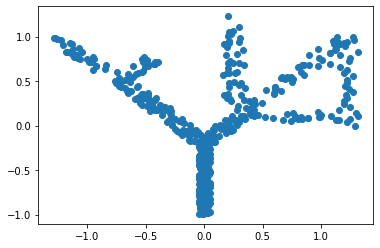

In [1]:
import elpigraph
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# load toy data
X_tree = np.loadtxt('../data/tree_data.csv',delimiter=',')[:,:2]
n = 30
x = np.repeat(1.2,n) + np.random.normal(scale=.05,size=n)
y = np.linspace(0,1,n)

X_tree_loop = np.vstack((X_tree, np.hstack((x[:,None],y[:,None]))))
plt.scatter(*X_tree_loop.T)
plt.show()


We can fit a principal graph with tree topology to the dataset, but it won't capture the loop

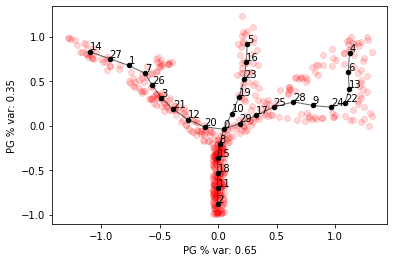

In [2]:
pg_tree = elpigraph.computeElasticPrincipalTree(
    X_tree_loop,NumNodes=30,
    Do_PCA=False,CenterData=False,
    MaxNumberOfGraphCandidatesDict={"AddNode2Node":20,"BisectEdge":10,"ShrinkEdge":10})[0]
elpigraph.plot.PlotPG(X_tree_loop,pg_tree,Do_PCA=False)

In this case we can add paths to the graph by fitting principal curves between two nodes.

After adding the paths, the entire graph can optionally be refitted. 

Elasticity parameters of cycle edges can be tuned separately and setting them lower can sometimes give better results

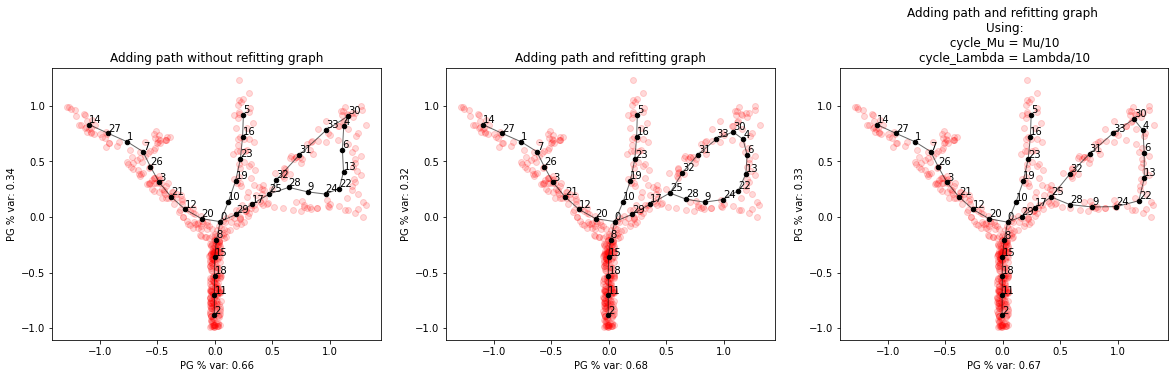

In [3]:
new_pg = elpigraph._graph_editing.addPath(X_tree_loop,pg_tree,4,25,refit_graph=False)
new_pg_refit = elpigraph._graph_editing.addPath(X_tree_loop,pg_tree,4,25,refit_graph=True)
new_pg_refit2 = elpigraph._graph_editing.addPath(X_tree_loop,pg_tree,4,25,refit_graph=True,Mu=.1,Lambda=.01,cycle_Mu=.01,cycle_Lambda=.001)
f,axs=plt.subplots(1,3,figsize=(20,5))
axs=axs.flat
axs[0].set_title('Adding path without refitting graph')
axs[1].set_title('Adding path and refitting graph')
axs[2].set_title('Adding path and refitting graph \nUsing:\n cycle_Mu = Mu/10 \ncycle_Lambda = Lambda/10')
elpigraph.plot.PlotPG(X_tree_loop,new_pg,Do_PCA=False,ax=next(axs))
elpigraph.plot.PlotPG(X_tree_loop,new_pg_refit,Do_PCA=False,ax=next(axs))
elpigraph.plot.PlotPG(X_tree_loop,new_pg_refit2,Do_PCA=False,ax=next(axs))

We can also guess paths to add based on simple heuristics, e.g.: the path connects nodes that are close in space, 

far along the graph and the resulting cycle doesn't contain many points

This is implemented by findPaths().

In [4]:
new_PG = elpigraph.findPaths(X_tree_loop,pg_tree,verbose=1,plot=True,)

Using default parameters: max_n_points=26, radius=0.52, min_node_n_points=2, min_path_len=6, nnodes=6
testing 0 candidates
Found no valid path to add


Default parameters (radius in particular) are too strict and no candidates are found. 

We can make the search more permissive by changing parameters

In [5]:
# printing suggestions with verbose
new_PG = elpigraph.findPaths(X_tree_loop,pg_tree,max_inner_fraction=.15,radius=1,verbose=1)

Using default parameters: max_n_points=26, radius=1.00, min_node_n_points=2, min_path_len=6, nnodes=6
testing 22 candidates
Suggested paths:
  source node  target node  inner fraction     MSE  n° of points in path
           25            4           0.134  0.0047                   101


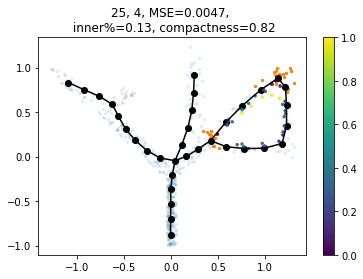

In [6]:
# plotting suggestions with plot
new_PG = elpigraph.findPaths(X_tree_loop,pg_tree,max_inner_fraction=.15,radius=1,plot=1)

The output PG dictionary contains the graph with all suggested paths added. In this case we only added one

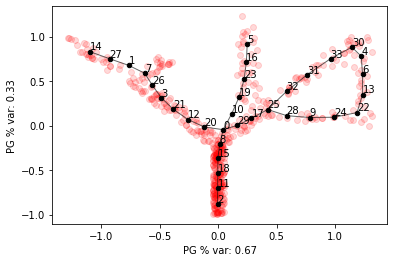

In [7]:
elpigraph.plot.PlotPG(X_tree_loop,new_PG,Do_PCA=False)